In [1]:
%%javascript
require(["codemirror/keymap/sublime", "notebook/js/cell", "base/js/namespace"],
    function(sublime_keymap, cell, IPython){
        cell.Cell.options_default.cm_config.keyMap = 'sublime';
        var cells = IPython.notebook.get_cells();
        for(var cl=0; cl< cells.length ; cl++){
            cells[cl].code_mirror.setOption('keyMap', 'sublime');
        }
    }
);

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pip install git+https://github.com/demetriomagatti/bioinformatics_basics.git@main

  Cloning https://github.com/demetriomagatti/bioinformatics_basics.git (to revision main) to /tmp/pip-req-build-nlra_w3o
  Running command git clone -q https://github.com/demetriomagatti/bioinformatics_basics.git /tmp/pip-req-build-nlra_w3o
Note: you may need to restart the kernel to use updated packages.


### Example

In [4]:
from bioinformatics_basics import alignment
solver = alignment.ManhattanSolver(nrows=5,ncols=5,MaxScore=10)

Initialized module


In [5]:
# matrix containing scores for "to nord" movements
solver.MoveNord

array([[2., 3., 1., 2., 2.],
       [8., 0., 7., 2., 9.],
       [8., 7., 2., 5., 2.],
       [3., 8., 6., 3., 1.]])

In [6]:
# matrix containing scores for "to east" movements
solver.MoveEast

array([[6., 2., 2., 2.],
       [1., 3., 8., 5.],
       [8., 0., 4., 5.],
       [6., 3., 4., 6.],
       [5., 0., 9., 8.]])

In [7]:
# matrix containing maximum score to a vertex - empty before running
solver.Score

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [8]:
# moves to maximize score to a vertex - empty before running
solver.Moves

{}

In [9]:
solver.run()

In [10]:
# matrix containing maximum score to a vertex
solver.Score

array([[ 0.,  6.,  8., 10., 12.],
       [ 2.,  9., 12., 20., 25.],
       [10., 18., 19., 23., 34.],
       [18., 25., 28., 32., 38.],
       [21., 33., 34., 43., 51.]])

In [11]:
# moves to maximize score to the final vertex
solver.Moves[list(solver.Moves.keys())[-1]]

['Nord', 'Nord', 'East', 'Nord', 'East', 'Nord', 'East', 'East']

In [12]:
# visual check
solver.visualize()

NameError: name 'plt' is not defined

In [14]:
class ManhattanSolver():
    def __init__(self,*args,**kwargs):
        # Set default parameters
        self.MaxScore = 10
        self.nrows = 10
        self.ncols = 10
        # Update with provided parameters
        self.__dict__.update(kwargs)
        # Actual initialization
        self.MoveEast = np.floor(self.MaxScore*np.random.rand(self.nrows,self.ncols-1))
        self.MoveNord = np.floor(self.MaxScore*np.random.rand(self.nrows-1,self.ncols))
        self.Score = np.zeros((self.nrows,self.ncols))
        self.Moves = {}
    
    
    def run(self):
        # Fill first column
        for i in range(1,self.nrows):
            self.Score[i,0] = self.Score[i-1,0] + self.MoveNord[i-1,0]
            self.Moves[str(i) + ',0'] = i*['Nord']
        # Fill first row
        for j in range(1,self.ncols):
            self.Score[0,j] = self.Score[0,j-1] + self.MoveEast[0,j-1]
            self.Moves['0,' + str(j)] = j*['East']
        # Iteratively fill the Score Matrix; save moves that maximize score to all vertexes
        for i in range(1,self.nrows):
            for j in range(1,self.ncols):
                self.Score[i,j] = max(self.Score[i-1,j] + self.MoveNord[i-1,j],
                                      self.Score[i,j-1] + self.MoveEast[i,j-1])
                if (self.Score[i-1,j] + self.MoveNord[i-1,j] > self.Score[i,j-1] + self.MoveEast[i,j-1]):
                    self.Moves[str(i) + ',' + str(j)] = self.Moves[str(i-1) + ',' + str(j)] + ['Nord']
                else:
                    self.Moves[str(i) + ',' + str(j)] = self.Moves[str(i) + ',' + str(j-1)] + ['East']
    
    
    def visualize(self):
        fig,ax = plt.subplots()
        # Plain grid plot
        x,y = np.meshgrid(np.arange(self.nrows),np.arange(self.ncols))
        ax.plot(x,y,'o',markersize=5,color='black')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        # Steps and scores
        for xpos in np.unique(x):
            for ypos in np.unique(y)[:-1]:
                ax.arrow(xpos,ypos+0.2,0,0.6,width=0.02,color='lightblue')
                ax.text(xpos,ypos+0.5,str(np.transpose(self.MoveNord)[xpos,ypos]))
        for xpos in np.unique(x)[:-1]:
            for ypos in np.unique(y):
                ax.arrow(xpos+0.2,ypos,0.6,0,width=0.02,color='lightblue')
                ax.text(xpos+0.5,ypos,str(np.transpose(self.MoveEast)[xpos,ypos]))
        return ax

<AxesSubplot:>

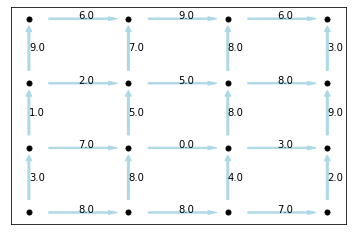

In [18]:
M = ManhattanSolver(nrows=4,ncols=4)
M.visualize()